모델을 학습시키는 방법을 알아봅시다

https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

In [2]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

1. 가상의 학습용 데이터를 만들어보겠습니다. (선형 분류가 어려운 예시입니다.)

In [8]:
# 2. 데이터셋 준비 (3개의 Feature를 가진 데이터)
x = np.random.rand(100, 3)
# 간단한 목표 변수 생성: y = 2*x1 - 3*x2 + 5*x3 + 1 + noise
y = 2*x[:, 0] - 3*x[:, 1] + 5*x[:, 2] + 1 + np.random.randn(100)

In [9]:
print(x.shape, y.shape)

(100, 3) (100,)


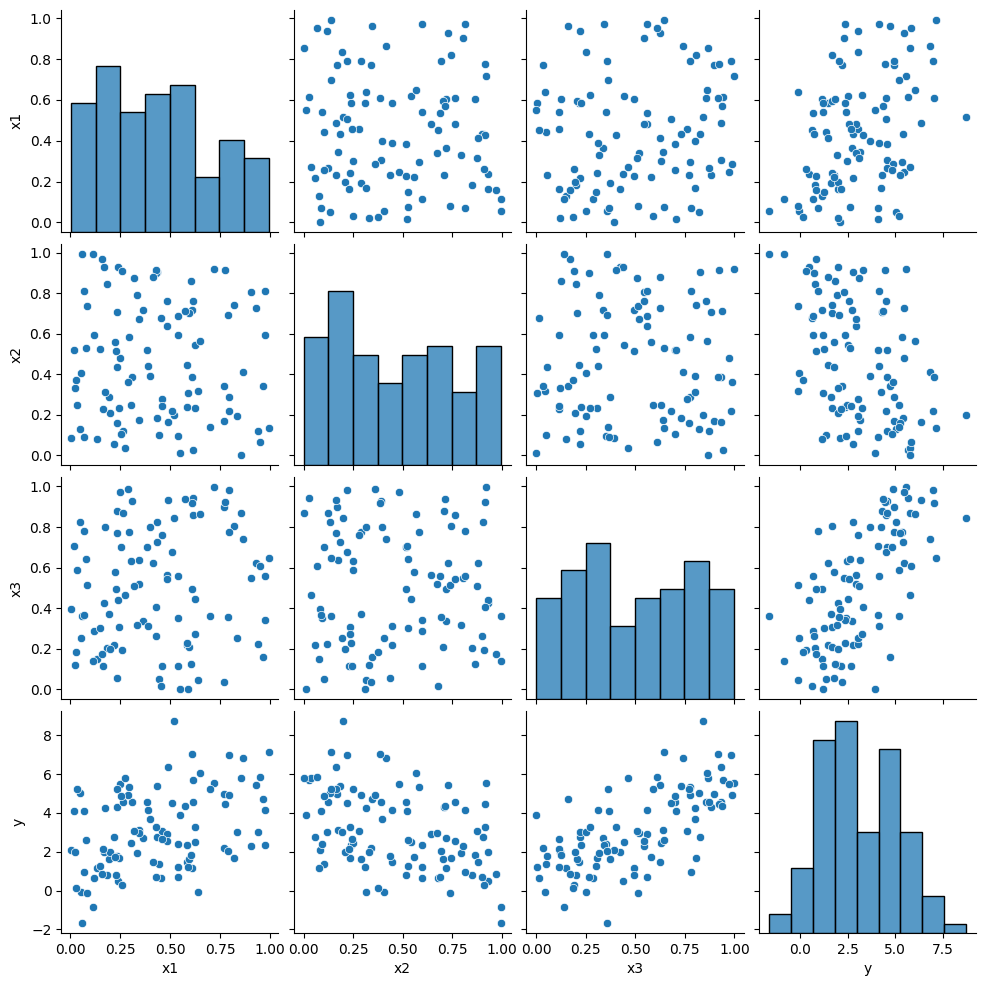

In [10]:
# Seaborn 라이브러리를 통해 시각화해보겠습니다.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Pandas DataFrame으로 결합
df = pd.DataFrame(x, columns=['x1', 'x2', 'x3'])
df['y'] = y

# Seaborn pairplot으로 모든 변수 간의 관계 시각화
sns.pairplot(df)
plt.show()

DataSet으로 변환 합니다. 여기서는 TensorDataset을 사용해서 변환해보겠습니다.

이전 수업에서 다룬것처럼 DataSet을 subclass해서 사용하면 되나,
텐서로 이루어진 데이터 등 기본적인 형태는 추가적인 클래스 형태를 제공해줍니다.

https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#Dataset

* numpy는 float64를 기본적으로 사용, 모델 가중치는 float32.. 따라서 float32로 맞추어줘야 함


In [23]:
# PyTorch 텐서로 변환
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Dataset과 DataLoader 준비
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)  # 데이터를 섞는 옵션을 지정


In [24]:
x_tensor.dtype, y_tensor.dtype

(torch.float32, torch.float32)

모델 정의 및 손실함수, 옵티마이저를 설정

In [26]:

# 3. 모델 정의 (Sequential 사용)
model = nn.Sequential(
    nn.Linear(3, 5),  # 입력 차원 3, 중간 층 차원 5
    nn.ReLU(),   # 비선형 특성 부여
    nn.Linear(5, 4),  # 중간 층 차원 5, 또 다른 중간 층 차원 4
    nn.ReLU(),
    nn.Linear(4, 1)   # 마지막 층 차원 4, 출력 차원 1
)

# 4. 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [27]:
# 5. 학습
epochs = 200  # 학습을 위해 에포크 수를 늘림
for epoch in range(epochs):
    for inputs, targets in dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()  # gradient 0으로 초기화
        loss.backward()   # gradient 계산
        optimizer.step()   # weight 수정

# 학습된 모델의 가중치 중 일부 확인
list(model.parameters())[:2]  # 첫 번째 선형 층의 가중치와 편향만 출력


[Parameter containing:
 tensor([[-0.1440, -0.1829,  0.1024],
         [-0.0665, -0.5617,  0.6216],
         [-0.4384, -0.0966,  0.5864],
         [ 0.4594,  0.2913, -0.2066],
         [-0.4731,  0.4557, -0.0696]], requires_grad=True),
 Parameter containing:
 tensor([0.3897, 0.5068, 0.0465, 0.6095, 0.4590], requires_grad=True)]